## 0️⃣ Overview

#### 머신러닝의 학습 방법들

- Gradient descent based learning

- Probability theory based learning

- <span style = 'background-color :#ffdce0' >Information theory based learning</span>  
    : 이 방법을 사용하는 것이 Decision Tree  
    
    Ex) Akinator : 스무고개로 유명인, 캐릭터를 맞추는 게임, 트리형태로 구성되어 있음
    
- Distance simlarity based learning

### ✔ Decision Tree Classifier
- Data를 가장 잘 구분할 수 있는 Tree를 구성함
- Data Y에 따라서 Y를 잘 표현할 수 있는 트리를 구성해서 분류해나가는 기법

### ✔ Decision Tree 만들기
- 어떤 질문(Attribute)이 가장 많은 해답(Y)을 줄 것인가?
- 결국 어떤 질문은 답의 모호성을 줄여줄 것인가?
- 문제를 통해서 splitting point을 설정  
    -> 남은 정보로 splitting point를 설정하는 식

Ex) 모호성을 줄여주는 예시  
- 답이 딱딱 나누어 떨어짐 => 모호성을 줄여줌
- 정확한 성능을 나타낼 수 있는 Tree

![ex1](./img/Ex1.PNG)
    

## 1️⃣ Information theory - Entropy

### ✔ Entropy
- 목적 달성을 위한 경우의 수를 정량적으로 표현하는 수치  
    $\Rightarrow$ 작을 수록 경우의 수가 적음

- Higher $\uparrow$  Entropy $\Rightarrow$ Higher uncertainty 불확실성 증가 $\uparrow$
- Lower $\downarrow$ Entropy $\Rightarrow$ Lower uncertainty 불확실성 감소 $\downarrow$

<span style = 'color : red'>Entropy가 작으면 얻을 수 있는 정보가 많다, 명확하다</span>

- $p_i$가 클수록 사건이 일어날 확률이 명확하다

##### $ h(D) = -\sum_{i=1}^m p_i log_2(p_i)$

h(D)의 값이 0에 가까워지면 Entropy는 $\downarrow$  
$\Rightarrow$ 불확실성이 $\downarrow$

확률이 1 $\rightarrow$ Entropy = 0  
확률이 작을수록 Entropy는 커진다  

![Entropy](./img/Entropy.PNG)

Ex) $m$ = 1,2,3  
$p_1 = 1$ $\Rightarrow$ $p_2 = p_3 = 0$  

$\Rightarrow$ h(D)에는 $p_1$만 남게되고, $h(D) = - p_1 log_2(p_1)$ 

이때, $log_2(p_1) = 0, -log_2(p_i) = 0 \Rightarrow h(D) = 0$  
$\Rightarrow$ Lower Entropy, Lower uncertainty

⚠ $p_i$의 값이 다양할 경우 $-log_2(p_i)$의 값은 증가 $\uparrow$  
$\Rightarrow$ 불확실성 $\uparrow$

Ex) No : 5개, Yes : 9개  

$\rightarrow h(D) = -\frac{9}{14} log_2\frac{9}{14} + -\frac{5}{14} log_2\frac{5}{14}  
= 0.940bits $ 

In [345]:
import numpy as np

In [346]:
x = np.array([9/14, 5/14])
y = np.log2(x)

-sum(x*y)

0.9402859586706311

## 2️⃣ Algorithms of Decision Tree
- Decision Tree 만드는 것을 시키는 알고리즘 필요

- 어떻게 하면 가장 잘 분기(branch)를 만들수 있는가?

- Data의 attribute를 기준으로 분기 생성 (어떤기준으로 나눌지)

- 어떤 attribute를 기준으로 했을 때 가장 Entropy가 작은가?

- 하나를 자른 후에 그 다음은 어떻게 할 것인가? 

- Decision Tree는 재귀적으로 생김  
: 큰 Attribute에서 sub attribute로 나눔

- 대산 라벨에 대해 어떤 Attribute가 더 확실한 정보를 제공하고 있는가?로 branch attribute를 선택

- 확실한 정보의 선택 기준은 알고리즘 별로 차이 발생

- Tree 생성 후 pruning을 통해 Tree generalization 시행  
( pruning : Overfitting을 방지하기 위해 가지치기하는 거 )

- 일반적으로 효율을 위해 Binary Tree 사용

### ✔ Decision Tree의 특징
- 비교적 간단, <span style = 'color : blue'>직관적으로 결과 표현</span>
- 훈련시간이 길고 메모리 공간을 많이 사용
- Top-down, Recursive, Divide and Conquer 기법  
Top-down : 위에서 아래로 내려가는 구조  
Recursive : 재귀적   
Divide and Conquer : 나눈 후에 또 다시 나누는 구조  

- Greedy 알고리즘 $\rightarrow$ 부분 최적화  
: 전체 optimization이 아닌 현재의 optimization을 찾음  
Ex) 주황에서도 최적화, 파랑에서도 최적화됨

![ex2](./img/Ex2.png)

### 💁‍♀️ Decision Tree의 장점
- 트리의 상단 부분 attribute들이 가장 중요한 예측변수  
$\Rightarrow$ attribute 선택 기법으로도 활용 가능

- Attribute의 scaling 필요 X
- 관측치의 절대값이 아닌 순서가 중요  
$\Rightarrow$ Outlier에 이점  
(Outlier : 정규분포에서 양극단에 있는 거)

- 자동적 변수 부분 선택 $\Leftarrow$ Tree Pruning 

### ✔ Algorithms of Decision Tree
- 크게 두가지 형태의 decision tree 알고리즘 존재  
    : 1. ID3, 2. CART

- 알고리즘 별 attribute branch 방법이 다름
- ID3 $\rightarrow$ C4.5(Ross Quinlan), CART
- 연속형 변수를 위한 regression tree도 존재 

## 3️⃣ ID3 & Information Gain

### ✔ Information Gain
- Entropy 함수를 도입하여 branch splitting
- Information Gain  
: Entropy를 사용하여 속성별 분류시 Impurity를 측정하는 지표

- (전체 Entropy - 속성별 Entropy)로 속셩별 Information Gain을 계산  
속성별 Entropy $\uparrow$ $\Rightarrow$ 복잡도 $\uparrow$  

$\Rightarrow$ 속성별 Entropy가 $\downarrow$ 속성을 선택해서 분기   
(가장 명확하게 데이터를 나눌 수 있음)

#### <span style = 'color : green'> 전체 데이터 D의 정보량 ( 전체 Information Gain )</span>
#### $Info(D) = -\sum_{i=1}^n P_i log_2(p_i)$

#### <span style = 'color : green'> 속성 A로 분류시 정보량 ( 속성 A의 Information Gain )</span>
#### $Info_A(D) = -\sum_{j=1}^v  \frac{\vert D_j \vert}{D} * Info(D_j)$
( j : 속성 A의 label,  Ex) j = red, blue )

#### <span style = 'color : green'> 속성 A의 정보 소득 </span>
#### <span style = 'background-color :#ffdce0' > $ Gain(A) = Info(D) - Info_A(D) $ </span>

$Gain(A) \downarrow $  
$\Rightarrow Info_A(D) \uparrow$   
$\Rightarrow$ 복잡도 $\uparrow$  

$\Rightarrow Info_A(D)$가 가장 $\downarrow$ , $Gain(A)\uparrow$ 선택

```
if 데이터 집합에 있는 모든 아이템이 같은 라벨임:
    분류 항목 표시를 반환 (Ex : buy_yes)

else:
    Find Best spllit_branch_attribute (Ex : attribute - age)
    해당 Attribute를 기준으로 dataset 분할
    Branch node 생성
        for each Branch
            branch_node.add(Recursive branch split)
    return branch node
```

### ✔ Growing a Decsion Tree

#### [ Age ] 👶🧑👧👵
#####  **$Gain(age)$** $= Info(D) - Info_{age}(D)$
##### **$Info_{age}(D)$** $= -\sum_{j=1}^v  \frac{\vert D_j \vert}{D} * Info(D_j)$

$ j \ni$ {youth, middle_age, senior}

Ex) $D_j$ : $ D_{youth} $= 5명, middle_age : 4명, senior   : 5명

##### **$Info_{age}(D)$**
##### = $\frac{5}{14} * (\frac{2}{5} log_2 \frac{2}{5} - \frac{3}{5} log_2 \frac{3}{5}) $ ;  age가 youth인 5명 중 yes : 2명, No : 3명
##### $+ \frac{4}{14} * (\frac{4}{4} log_2 \frac{4}{4} ) $
##### $+ \frac{5}{14} * (\frac{3}{5} log_2 \frac{3}{5} - \frac{2}{5} log_2 \frac{2}{5}) $

##### **$Info(D)$** $= -\frac{9}{14}(log_2 \frac{9}{14}) -\frac{5}{14}(log_2 \frac{5}{14})$

#### [ Credit ] 💳
$Gain(Credit) = Info(D) - Info_{Credit}(D)$

#### [ Income ] 💵💴💶
$Gain(Income) = Info(D) - Info_{Income}(D)$

#### [ Student ] 👩‍🎓👨‍🎓
$Gain(Student) = Info(D) - Info_{Student}(D)$




In [347]:
import pandas as pd
import numpy as np

In [348]:
pd_data = pd.read_csv('https://raw.githubusercontent.com/AugustLONG/ML01/master/01decisiontree/AllElectronics.csv')
pd_data.drop('RID', axis = 1)
pd_data

,RID,age,income,student,credit_rating,class_buys_computer
0,1,youth,high,no,fair,no
1,2,youth,high,no,excellent,no
2,3,middle_aged,high,no,fair,yes
3,4,senior,medium,no,fair,yes
4,5,senior,low,yes,fair,yes
5,6,senior,low,yes,excellent,no
6,7,middle_aged,low,yes,excellent,yes
7,8,youth,medium,no,fair,no
8,9,youth,low,yes,fair,yes
9,10,senior,medium,yes,fair,yes


In [349]:
buy = pd_data.loc[pd_data['class_buys_computer'] == 'yes']
not_buy = pd_data.loc[pd_data['class_buys_computer'] == 'no']

In [350]:
buy

,RID,age,income,student,credit_rating,class_buys_computer
2,3,middle_aged,high,no,fair,yes
3,4,senior,medium,no,fair,yes
4,5,senior,low,yes,fair,yes
6,7,middle_aged,low,yes,excellent,yes
8,9,youth,low,yes,fair,yes
9,10,senior,medium,yes,fair,yes
10,11,youth,medium,yes,excellent,yes
11,12,middle_aged,medium,no,excellent,yes
12,13,middle_aged,high,yes,fair,yes


In [351]:
not_buy

,RID,age,income,student,credit_rating,class_buys_computer
0,1,youth,high,no,fair,no
1,2,youth,high,no,excellent,no
5,6,senior,low,yes,excellent,no
7,8,youth,medium,no,fair,no
13,14,senior,medium,no,excellent,no


In [352]:
x = np.array([len(buy) / len(pd_data), len(not_buy) / len(pd_data)])
y = np.log2(x)

info_all = -sum( x * y)

x, y, info_all

(array([0.64285714, 0.35714286]),
 array([-0.63742992, -1.48542683]),
 0.9402859586706311)

$Info(D)$ 함수화 해보기

In [353]:
def get_info(df):
    buy = df.loc[df['class_buys_computer'] == 'yes']
    not_buy = df.loc[df['class_buys_computer'] == 'no']
    x = np.array([len(buy) / len(df), len(not_buy) / len(df)])
    y = np.log2(x[x!=0])

    info_all = -sum( x[x!=0] * y)
    return info_all

In [354]:
get_info(pd_data)

0.9402859586706311

Attribute 별 information gain 구하기

In [355]:
youth = pd_data.loc[pd_data['age'] == 'youth']
senior = pd_data.loc[pd_data['age'] == 'senior']
middle_aged = pd_data.loc[pd_data['age'] == 'middle_aged']

In [356]:
youth

,RID,age,income,student,credit_rating,class_buys_computer
0,1,youth,high,no,fair,no
1,2,youth,high,no,excellent,no
7,8,youth,medium,no,fair,no
8,9,youth,low,yes,fair,yes
10,11,youth,medium,yes,excellent,yes


age = youth일 때의 Entropy

In [357]:
get_info(youth)

0.9709505944546686

In [358]:
senior

,RID,age,income,student,credit_rating,class_buys_computer
3,4,senior,medium,no,fair,yes
4,5,senior,low,yes,fair,yes
5,6,senior,low,yes,excellent,no
9,10,senior,medium,yes,fair,yes
13,14,senior,medium,no,excellent,no


In [359]:
get_info(senior)

0.9709505944546686

In [360]:
middle_aged

,RID,age,income,student,credit_rating,class_buys_computer
2,3,middle_aged,high,no,fair,yes
6,7,middle_aged,low,yes,excellent,yes
11,12,middle_aged,medium,no,excellent,yes
12,13,middle_aged,high,yes,fair,yes


In [361]:
get_info(middle_aged)

-0.0

각 속성별 Entropy 함수화하기

In [362]:
def get_attribute_info(df, attribute_name) :
    # Ex) attribute_name : age
    
    attribute_values = df[attribute_name].unique()
    # attribute_values = youth, middle_age, senior
    print(attribute_values)
    
    get_infos = []

    for value in attribute_values:
        split_df = df.loc[df[attribute_name] == value]

        get_infos.append( (len(split_df) / len(df)) * get_info(split_df))

    return sum(get_infos)

In [363]:
get_attribute_info(pd_data, 'age')

['youth' 'middle_aged' 'senior']


0.6935361388961918

### 최종적으로 Information Gain의 값
$ Gain(age) = Info(D) - Info_{age}(D) $

In [364]:
get_info(pd_data) - get_attribute_info(pd_data, 'age')

['youth' 'middle_aged' 'senior']


0.24674981977443933

$ Gain(credit) = Info(D) - Info_{credit}(D) $

In [365]:
get_info(pd_data) - get_attribute_info(pd_data, 'credit_rating')

['fair' 'excellent']


0.04812703040826949

$ Gain(income) = Info(D) - Info_{income}(D) $

In [366]:
get_info(pd_data) - get_attribute_info(pd_data, 'income')

['high' 'medium' 'low']


0.02922256565895487

$ Gain(student) = Info(D) - Info_{student}(D) $

In [367]:
get_info(pd_data) - get_attribute_info(pd_data, 'student')

['no' 'yes']


0.15183550136234159

위의 4가지 속성 중 가장 큰 Gain의 Attribute는 Age인 것을 볼 수 있다.  
= Age의 Entropy가 가장 작다 = 헷가리는 것이 작다. = 먼저 분류할 Attribute

먼저, Age Attribute를 기준으로 branch

![branch](https://ifh.cc/g/JXRamt.jpg)

다음으로는 youth를 기준으로 branch, senior 기준으로 branch  

위와 똑같은 방식으로 youth를 기준으로 branch 해보자


In [368]:
youth = pd_data.loc[pd_data['age'] == 'youth']
youth

,RID,age,income,student,credit_rating,class_buys_computer
0,1,youth,high,no,fair,no
1,2,youth,high,no,excellent,no
7,8,youth,medium,no,fair,no
8,9,youth,low,yes,fair,yes
10,11,youth,medium,yes,excellent,yes


In [369]:
get_info(youth) - get_attribute_info(youth, 'income')

['high' 'medium' 'low']


0.5709505944546686

In [370]:
get_info(youth) - get_attribute_info(youth, 'student')

['no' 'yes']


0.9709505944546686

In [371]:
get_info(youth) - get_attribute_info(youth, 'credit_rating')

['fair' 'excellent']


0.01997309402197489

income, student, credit_rating의 information Gain 중 가장 큰 값을 가지는 Attribute는 student이다. 

$\Rightarrow$ Student를 기준으로 branch

![branch1](./img/branch1.PNG)

잘 나눠졌으므로 senior 기준으로 다시 branch

## 4️⃣ C4.5 & Gini Index

### ✔ Information Gain의 문제점
- 어떤 Attribute에 포함된 값이 다양할 수록 선택되고자 함

이게 무슨 말이냐면   

예를 들어서 age라는 Attribute에 1~100까지 모두 하나씩 있다고 해보자   

그러면 $Info_A(D)$의 식에서 $\frac{\vert D_j \vert}{\vert D \vert}$가 작은 값을 가지게 될 것이다.  

$\Rightarrow Info_A(D) \downarrow \Rightarrow Gain(A) \uparrow$  

##### $Gain(A) = info(D) - Info_A(D)$
##### $Info_A(D) = \sum_{j=1}^v \frac{\vert D_j \vert}{\vert D \vert} * Info(D_j)$
##### $Info(D) = - \sum_{i=1}^n p_i log_2 (p_i)$

- 한 Attribute가 모두 다른 값을 가질 때   
<span style = 'color : red'>보완을 해줄 다른 Measure 필요</span>

### ✔ Gain Ratio
- ID3의 발전형인 C4.5 알고리즘에서 사용되는 measure
- Info(D)의 값을 평준화시켜 분할 정보 값을 대신 사용
- 값이 다양할 수록 weight를 줘 penalty 부여

##### $ splitInfo_A(D) = -\sum_{j=1}^v \frac{\vert D_j \vert}{\vert D \vert} * (log_2 \frac{\vert D_j \vert}{\vert D \vert})$
##### $ GainRatio(A) = \frac{Gain(A)}{SplitInfo_A(D)} = \frac{Info(D) - Info_A(D)}{SplitInfo_A(D)} $

![c4](./img/c4.PNG)

Ex) $SplitInfo_A(D)$  

총 데이터 14개 중에서 j = 1인 데이터의 개수가 2개인 경우  

$\frac{\vert D_j \vert}{\vert D \vert}$는 작을 것이고,  - $log_2 \frac{\vert D_j \vert}{\vert D \vert}$는 클 것이다.  

(위의 그래프를 보면 $p_i$가 작아질수록 $-log_2(p_i)$가 커지는 것을 볼 수 있다.)

$\Rightarrow$ 이런 경우 $splitInfo_A(D)$의 값이 커지게 되며 $GainRatio(A)$의 값은 작아질 것이다.


<span style = 'background-color : #f5f0ff'>$SplitInfo_A(D) \uparrow \ \Rightarrow GainRatio(A) \downarrow  \ \Rightarrow SplitInfo_A(D) : Penalty$ </span>

### ✔ Gini Index
- CART 알고리즘의 split measure
- 훈련 튜플 세트를 파티션을 나누었을때 불순한 정도를 측정
##### $Gini(D) = 1 - \sum_{i=1}^m p_i^2 = 1 - \sum_{i=1}^m \frac{\vert C_{i,D} \vert}{\vert D \vert}$
where $C_i$ is a class

- class 별로 데이터 개수 구해서 하는 방식

- 데이터의 대상 속성을 얼마나 잘못 분류할지를 계산

- 실제 Gini Index는 Entropy와 비슷한 그래프가 그려짐

- 0.5일 때 Impurity의 최대화, 약 극점에서 0

##### $ Gini(D) = \sum_{i=1}^m p_i (1-p_i) = 1 - \sum_{i=1}^m p_i^2 = 1 - \sum_{i=1}^m \frac{\vert C_{i,D} \vert}{\vert D \vert} $

![Gini](./img/Gini.PNG)

### ✔ <span style = 'background-color : #ffdce0'> Binary Split </span>
: 컴퓨터가 searching을 잘 할 수 있는 방법 중 하나

- CART 알고리즘은 Binary Split을 전제로 분석


    이게 무슨 말이냐

    Ex) category data가 youth, middle, senior로 구분될 때  

    youth와 나머지 /  middle과 나머지 / senior와 나머지로 각각 3개의 binary split을 해서 구하는 방식
  
    그렇다면 아래의 식에서 A는 youth, middle, senior를 뜻하며 총 3개의 Gini의 값이 나올것이다.   
    

- k가 속성 내 데이터 분류의 개수일 때 $2^{k-1} - 1$개 만큼의 Split 생성

    $ \Rightarrow $ C4.5에 비해 많은 split이 생김

##### $ Gini_A(D) = \frac{\vert D_1 \vert}{\vert D \vert }Gini(D_1) +  \frac{\vert D_2 \vert}{\vert D \vert }Gini(D_2) $

-  <span style = 'color : purple'> Gini 값이 가장 작은 분류를 선택</span>

### Growing a CART Decision Tree

#### **[ Age ]**
$ Gini_{age}(D)$ $age \in $ {youth, middle_age, senior}  

![gini_age](./img/Gini_Age.PNG)

##### 세 가지 경우의 모든 Gini Index 산출

$age_1 \in $ {youth} = {middle_age, senior}  
$age_2 \in $ {middle_age} = {youth, senior}  
$age_3 \in $ {senior} = {youth, middle_age}  

##### $ Gini_A(D) = \frac{\vert D_1 \vert}{\vert D \vert }Gini(D_1) +  \frac{\vert D_2 \vert}{\vert D \vert }Gini(D_2) $

##### Ex) youth와 나머지를 Binary Split 했을 경우 
$\Rightarrow \ age_1$ : youth = 5명, 나머지 : 9명 

##### $ Gini_{age_1} = \frac{5}{14}Gini(D_1) +  \frac{9}{14}Gini(D_2) $  

$ Gini(D_1)$ : youth 중 yes = 2명 , no = 3명

##### $ Gini(D_1) = 1 - (\frac{3}{5})^2 - (\frac{2}{5})^2 $  

$ Gini(D_2) $ : 나머지 중 yes : 7명, no : 2명

##### $ Gini(D_2) = 1 - (\frac{7}{9})^2 - (\frac{2}{9})^2 $

In [372]:
import numpy as np
import pandas as pd

In [373]:
from dataclasses import replace


pd_data = pd.read_csv('https://raw.githubusercontent.com/AugustLONG/ML01/master/01decisiontree/AllElectronics.csv')
pd_data.drop('RID', axis =1)
pd_data

,RID,age,income,student,credit_rating,class_buys_computer
0,1,youth,high,no,fair,no
1,2,youth,high,no,excellent,no
2,3,middle_aged,high,no,fair,yes
3,4,senior,medium,no,fair,yes
4,5,senior,low,yes,fair,yes
5,6,senior,low,yes,excellent,no
6,7,middle_aged,low,yes,excellent,yes
7,8,youth,medium,no,fair,no
8,9,youth,low,yes,fair,yes
9,10,senior,medium,yes,fair,yes


In [374]:
youth = pd_data.loc[pd_data['age'] == 'youth']
youth

,RID,age,income,student,credit_rating,class_buys_computer
0,1,youth,high,no,fair,no
1,2,youth,high,no,excellent,no
7,8,youth,medium,no,fair,no
8,9,youth,low,yes,fair,yes
10,11,youth,medium,yes,excellent,yes


In [375]:
youth.index

Int64Index([0, 1, 7, 8, 10], dtype='int64')

difference(index) : index의 차집합을 구해줌

In [376]:
pd_data.index.difference(youth.index)

Int64Index([2, 3, 4, 5, 6, 9, 11, 12, 13], dtype='int64')

In [377]:
middle_senior = pd_data.loc[pd_data.index.difference(youth.index)]
middle_senior

,RID,age,income,student,credit_rating,class_buys_computer
2,3,middle_aged,high,no,fair,yes
3,4,senior,medium,no,fair,yes
4,5,senior,low,yes,fair,yes
5,6,senior,low,yes,excellent,no
6,7,middle_aged,low,yes,excellent,yes
9,10,senior,medium,yes,fair,yes
11,12,middle_aged,medium,no,excellent,yes
12,13,middle_aged,high,yes,fair,yes
13,14,senior,medium,no,excellent,no


### Gini Index 구하는 함수

##### $ Gini(D) = \sum_{i=1}^m p_i (1-p_i) = 1 - \sum_{i=1}^m p_i^2 = 1 - \sum_{i=1}^m \frac{\vert C_{i,D} \vert}{\vert D \vert} $

아래의 코드는 별로 좋은 코드 아님

In [378]:
def get_gini(df):

    buy_df = df.loc[df['class_buys_computer'] == 'yes']
    not_buy_df = df.loc[df['class_buys_computer'] == 'no']

    if len(buy_df) == 0:
        buy_value = 0

    else:
        buy_value = len(buy_df)

    if len(not_buy_df) == 0:
        not_buy_value = 0

    else:
        not_buy_value = len(not_buy_df)

    result = ( buy_value / len(df) ) ** 2 + ( not_buy_value / len(df) ) ** 2

    return 1 - result
    

In [379]:
from itertools import chain, combinations

결합되는 모든 경우의 수를 나타내는 함수

In [380]:
def powerset(data):
    listed_data = list(data)
    chain_set = chain.from_iterable(combinations(listed_data, i) for i in range(len(listed_data)+1 ))

    return [set_data for set_data in chain_set]

In [381]:
powerset(pd_data['age'].unique())

[(),
 ('youth',),
 ('middle_aged',),
 ('senior',),
 ('youth', 'middle_aged'),
 ('youth', 'senior'),
 ('middle_aged', 'senior'),
 ('youth', 'middle_aged', 'senior')]

In [382]:
def get_binary_split(df, attribute):
    powerset_data = powerset( df[attribute].unique() )
    result = []

    # ()와 같이 0이 되는 것은 빼주기
    result = [ data for data in powerset_data if len(data) != 0]
    print('result:', result)

    # 모든 값이 포함되어 있는 것은 빼주기
    result = [set(data) for data in result if len(data) != len(df[attribute].unique())]

    return result

In [383]:
get_binary_split(pd_data, 'age')

result: [('youth',), ('middle_aged',), ('senior',), ('youth', 'middle_aged'), ('youth', 'senior'), ('middle_aged', 'senior'), ('youth', 'middle_aged', 'senior')]


[{'youth'},
 {'middle_aged'},
 {'senior'},
 {'middle_aged', 'youth'},
 {'senior', 'youth'},
 {'middle_aged', 'senior'}]

### Gini Index 구하는 함수

In [384]:
def get_attribute_gini_index(df, attribute_name):

    # 모든 경우의 수 구하기
    split_attributes = get_binary_split(pd_data, attribute_name)

    result = {}

    for split_attr in split_attributes:
        indexes = [df.loc[df[attribute_name] == attr ].index for attr in split_attr]

        d1_index = indexes[0]

        for index in indexes[1:]:
            # union : 합집합
            d1_index = d1_index.union(index)
            
        d2_index = df.index.difference(d1_index)

        d1_gini = (len(d1_index) / len(df)) * get_gini(df.loc[d1_index])
        d2_gini = (len(d2_index) / len(df)) * get_gini(df.loc[d2_index])
        d_split_gini = d1_gini + d2_gini

        result['_'.join(split_attr)] = d_split_gini

    return result


In [385]:
get_attribute_gini_index(pd_data, 'age')

result: [('youth',), ('middle_aged',), ('senior',), ('youth', 'middle_aged'), ('youth', 'senior'), ('middle_aged', 'senior'), ('youth', 'middle_aged', 'senior')]


{'youth': 0.3936507936507937,
 'middle_aged': 0.35714285714285715,
 'senior': 0.45714285714285713,
 'youth_middle_aged': 0.45714285714285713,
 'youth_senior': 0.35714285714285715,
 'senior_middle_aged': 0.3936507936507937}

위의 결과를 보면 senior와 middle_aged_youth가 동일한 값을 가지는 것을 볼 수 있다.  
이는, senior일 경우에 나머지가 middle_aged_youth이고, 반대도 동일하기 때문이다.

In [386]:
get_attribute_gini_index(pd_data, 'credit_rating')

result: [('fair',), ('excellent',), ('fair', 'excellent')]


{'fair': 0.42857142857142855, 'excellent': 0.42857142857142855}

In [387]:
get_attribute_gini_index(pd_data, 'student')

result: [('no',), ('yes',), ('no', 'yes')]


{'no': 0.3673469387755103, 'yes': 0.3673469387755103}

## 5️⃣ Tree prunning (Tree 가지치기)

### Decision Tree 생성 시 문제점
- class의 leaf node의 결정

- 복잡하게 너무 많은 가지가 생길 경우 $\rightarrow$ Overfitting

- impurity or variance는 낮은데, 노드에 데이터가 1개

- 어떤 시점에서 트리 가지치기 해야할 지 결정이 중요

### Pre-prunnig
: Tree 생성 전에 정해주는 거  

Ex) hyperparameter로 Tree depth, leaf node의 개수 제한 등등 사전에 지정

- Tree 생성 시, 일정 기준 이하면 노드 생성 X
    
    $\Rightarrow$ 하위 노드 개수, 하위 노드의 label 비율 (Ex : 한쪽이 95?)

- Threshold를 잡아줘야 하는 어려움, CHAID등 사용

- 계산 효율이 좋고 작은 데이터셋에서 잘 작동

- 속성을 놓칠 수 있음, underfitting 가능성이 $\uparrow$

### Post-prunnig
- Tree 생성 후 Tree의 오차율 최소화를 위해 실행

- 오분류율 최소화, cost complexity 최소화 등을 사용

- 검증을 위한 validation set을 따로 생성

![error](./img/Error.PNG)

어느 정도의 node 수를 초과하게 되면 Test Dataset의 Error가 $\uparrow$ 

$\Rightarrow$ 어느 정도 node의 수가 되었을 때 잘라야함

## 6️⃣ Decision tree with scikit-learn

```
sklearn.tree.DecisionTreeClassifier
```

- criterion (분류 기준)  
: string, optional (default = 'gini)  
Decision Tree를 구현하는 거는 CART 알고리즘을 많이 사용

- max_depth  
: Overfitting 방지  
int or None, optional (default = None)

- min_samples_split  
: 최소한의 sample의 개수 이상이어야 split할 거임  
int, float, optional (default = 2)

- min_samples_leaf  
: leaf가 적어도 몇개이상일 때 넘어감  
int, float, optional (default = 1)

- max_features  
: split할 feature의 최대 개수  
int, float, string or None, optional (default = None)

- max_leaf_nodes  
int or None, oprional (default = None)

### Casestudy -Titanic
: Titanic에 탑승한 승객 정보를 승객의 구출 여부 결정

In [388]:
import pandas as pd
import warnings
warnings.filterwarnings(action = 'ignore')

### Load Dataset

In [389]:
train_df = pd.read_csv('https://raw.githubusercontent.com/TeamLab/machine_learning_from_scratch_with_python/master/code/ch12/titanic/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [390]:
test_df = pd.read_csv('https://raw.githubusercontent.com/TeamLab/machine_learning_from_scratch_with_python/master/code/ch12/titanic/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [391]:
len(train_df), len(test_df)

(891, 418)

In [392]:
train_id = train_df['PassengerId'].values
test_id = test_df['PassengerId'].values

train_id[-1], test_id[-1]

(891, 1309)

In [393]:
all_df = train_df.append(test_df).set_index('PassengerId')
all_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 데이터 전처리

성별 재할당 : 남 $\rightarrow$ 0, 여 $\rightarrow$ 1

In [394]:
all_df["Sex"] = all_df["Sex"].replace({"male":0,"female":1})
all_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


### 결측치 확인

In [395]:
all_df.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

### Age 결측치 처리

In [396]:
all_df.groupby("Pclass")["Age"].transform("mean")

PassengerId
1       24.816367
2       39.159930
3       24.816367
4       39.159930
5       24.816367
          ...    
1305    24.816367
1306    39.159930
1307    24.816367
1308    24.816367
1309    24.816367
Name: Age, Length: 1309, dtype: float64

In [397]:
all_df['Age'].fillna(all_df.groupby('Pclass')['Age'].transform('mean'), inplace = True)

all_df.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

### Cabin 결측치 처리
짐을 많이 들고다니면 돈이 많지 않을까 라고 생각했대

In [398]:
all_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [399]:
all_df["cabin_count"] = all_df["Cabin"].map(lambda x : len(x.split()) if type(x) == str else 0)
all_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_count
PassengerId,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1
5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0


### Name feature에 있는 Mr., Mrs. 등으로 분석

In [400]:
all_df["Name"][:5]

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

In [401]:
def transform_status(x):
    if "Mrs" in x or "Ms" in x:
        return "Mrs" 
    elif "Mr" in x:
        return "Mr"
    elif "Miss" in x:
        return "Miss"
    elif "Master" in x:
        return "Master"
    elif "Dr" in x:
        return "Dr"
    elif "Rev" in x:
        return "Rev"
    elif "Col" in x:
        return "Col"
    else:
        return "0"

In [402]:
all_df["Name"].unique().tolist()[-10:]

['Riordan, Miss. Johanna Hannah""',
 'Peacock, Miss. Treasteall',
 'Naughton, Miss. Hannah',
 'Minahan, Mrs. William Edward (Lillian E Thorpe)',
 'Henriksson, Miss. Jenny Lovisa',
 'Spector, Mr. Woolf',
 'Oliva y Ocana, Dona. Fermina',
 'Saether, Mr. Simon Sivertsen',
 'Ware, Mr. Frederick',
 'Peter, Master. Michael J']

In [403]:
all_df["social_status"] = all_df["Name"].map(lambda x : transform_status(x))

In [404]:
all_df["social_status"].value_counts()

Mr        758
Miss      258
Mrs       203
Master     61
0           9
Rev         8
Dr          8
Col         4
Name: social_status, dtype: int64

#### social_status == 0인 Name 살펴보기

In [405]:
all_df[all_df["social_status"] == "0"]["Name"]

PassengerId
31                               Uruchurtu, Don. Manuel E
370                         Aubart, Mme. Leontine Pauline
450                        Peuchen, Major. Arthur Godfrey
537                     Butt, Major. Archibald Willingham
642                                  Sagesser, Mlle. Emma
746                          Crosby, Capt. Edward Gifford
760     Rothes, the Countess. of (Lucy Noel Martha Dye...
823                       Reuchlin, Jonkheer. John George
1306                         Oliva y Ocana, Dona. Fermina
Name: Name, dtype: object

In [406]:
all_df.iloc[train_id-1].isnull().sum()

Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
cabin_count        0
social_status      0
dtype: int64

### Emvarked 결측치 처리

Embarked : 어디에서 출발해는지

In [407]:
all_df[all_df["Embarked"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_count,social_status
PassengerId,,,,,,,,,,,,,
62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN,1,Miss
830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN,1,Mrs


Drop Embarked

In [408]:
all_df =all_df.drop([62,830])

In [409]:
all_df.isnull().sum()

Survived          418
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                1
Cabin            1014
Embarked            0
cabin_count         0
social_status       0
dtype: int64

Train_id에서도 Embarked 결측치 drop

In [410]:
import numpy as np 

train_id = np.delete(train_id, [62-1,830-1])

In [411]:
all_df.iloc[:len(train_id)].isnull().sum()

Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           0
cabin_count        0
social_status      0
dtype: int64

### Fare 결측치 처리

In [412]:
all_df[all_df["Fare"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_count,social_status
PassengerId,,,,,,,,,,,,,
1044,NaN,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S,0,Mr


In [413]:
all_df.groupby(["Pclass","Sex"])["Fare"].mean()

Pclass  Sex
1       0       69.888385
        1      109.826644
2       0       19.904946
        1       23.234827
3       0       12.415462
        1       15.324250
Name: Fare, dtype: float64

In [414]:
all_df.loc[all_df["Fare"].isnull(), "Fare"] = 12.415462

In [415]:
all_df.isnull().sum()

Survived          418
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin            1014
Embarked            0
cabin_count         0
social_status       0
dtype: int64

In [416]:
all_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_count,social_status
PassengerId,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs
3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,Mrs
5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,Mr


### Cabin 결측치 처리

In [417]:
all_df["cabin_type"] = all_df["Cabin"].map(lambda x : x[0] if type(x) == str else "99")

In [418]:
all_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_count,social_status,cabin_type
PassengerId,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr,99
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,C
3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,99
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,Mrs,C
5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,Mr,99


In [419]:
del all_df["Cabin"]
del all_df["Name"]
del all_df["Ticket"]

In [420]:
all_df.loc[train_id]['Survived'].isnull().sum()

0

In [421]:
y = all_df.loc[train_id, "Survived"].values
y[:100]

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.])

In [422]:
len(y), len(train_id)

(889, 889)

In [423]:
del all_df["Survived"]

### OneHot Encoding

In [424]:
X_df = pd.get_dummies(all_df)
X_df 

,Pclass,Sex,Age,SibSp,Parch,Fare,cabin_count,Embarked_C,Embarked_Q,Embarked_S,...,social_status_Rev,cabin_type_99,cabin_type_A,cabin_type_B,cabin_type_C,cabin_type_D,cabin_type_E,cabin_type_F,cabin_type_G,cabin_type_T
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,0,22.000000,1,0,7.2500,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,1,1,38.000000,1,0,71.2833,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3,1,26.000000,0,0,7.9250,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,1,1,35.000000,1,0,53.1000,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5,3,0,35.000000,0,0,8.0500,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,0,24.816367,0,0,8.0500,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1306,1,1,39.000000,0,0,108.9000,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1307,3,0,38.500000,0,0,7.2500,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


numpy module로 변환

In [425]:
X = X_df.values
X

array([[ 3.        ,  0.        , 22.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  1.        , 38.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 3.        ,  1.        , 26.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 3.        ,  0.        , 38.5       , ...,  0.        ,
         0.        ,  0.        ],
       [ 3.        ,  0.        , 24.81636727, ...,  0.        ,
         0.        ,  0.        ],
       [ 3.        ,  0.        , 24.81636727, ...,  0.        ,
         0.        ,  0.        ]])

In [426]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

minmax_scaler.fit(X)
X = minmax_scaler.transform(X)

In [427]:
X

array([[1.        , 0.        , 0.27345609, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.473882  , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.32356257, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.48014531, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.30873565, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.30873565, ..., 0.        , 0.        ,
        0.        ]])

In [428]:
X_train = X[:len(train_id)]
X_test = X[len(train_id):]

In [429]:
len(X_train), len(y)

(889, 889)

In [430]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [431]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

algorithmes = [LogisticRegression(), DecisionTreeClassifier()]

In [432]:
c_params = [0.1,  5.0, 7.0, 10.0, 15.0, 20.0, 100.0]

params = []
params.append([{
    "solver" : ["saga"],
    "penalty" : ["l1"],
    "C" : c_params
    },{
    "solver" : ['liblinear'],
    "penalty" : ["l2"],
    "C" : c_params
    }
    ])
params.append({
    "criterion" : ["gini", "entropy"],
    "max_depth" : [10,8,7,6,5,4,3,2],
    "min_samples_leaf": [1,2,3,4,5,6,7,8,9]})

In [433]:
params

[[{'solver': ['saga'],
   'penalty': ['l1'],
   'C': [0.1, 5.0, 7.0, 10.0, 15.0, 20.0, 100.0]},
  {'solver': ['liblinear'],
   'penalty': ['l2'],
   'C': [0.1, 5.0, 7.0, 10.0, 15.0, 20.0, 100.0]}],
 {'criterion': ['gini', 'entropy'],
  'max_depth': [10, 8, 7, 6, 5, 4, 3, 2],
  'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]}]

In [434]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

scoring = ['accuracy']
estimator_results = []
for i, (estimator, params) in enumerate(zip(algorithmes,params)):
    gs_estimator = GridSearchCV(
            refit="accuracy", estimator=estimator,param_grid=params, scoring=scoring, cv=5, verbose=1, n_jobs=4)
    print(gs_estimator)

    gs_estimator.fit(X_train, y)
    estimator_results.append(gs_estimator)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=4,
             param_grid=[{'C': [0.1, 5.0, 7.0, 10.0, 15.0, 20.0, 100.0],
                          'penalty': ['l1'], 'solver': ['saga']},
                         {'C': [0.1, 5.0, 7.0, 10.0, 15.0, 20.0, 100.0],
                          'penalty': ['l2'], 'solver': ['liblinear']}],
             refit='accuracy', scoring=['accuracy'], verbose=1)
Fitting 5 folds for each of 14 candidates, totalling 70 fits
GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 8, 7, 6, 5, 4, 3, 2],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             refit='accuracy', scoring=['accuracy'], verbose=1)
Fitting 5 folds for each of 144 candidates, totalling 720 fits


### Logistic Regression

In [435]:
estimator_results[0].best_score_

0.8268075922046594

### Decision Tree

In [436]:
estimator_results[1].best_score_

0.8358154002412238

In [437]:
import pandas as pd
from pandas import DataFrame
from collections import defaultdict

result_df_dict = {}

result_attributes = ["model", "accuracy", "penalty", "solver", "C", "criterion", "max_depth", "min_samples_leaf"]
result_dict = defaultdict(list)

algorithm_name= ["LogisticRegression", "DecisionTreeClassifier"]

for i, estimators in enumerate(estimator_results):
    number_of_estimators = len(estimators.cv_results_["mean_fit_time"])

    for idx_estimator in range(number_of_estimators):
        result_dict["model"].append(algorithm_name[i])
        result_dict["accuracy"].append(
            estimators.cv_results_["mean_test_accuracy"][idx_estimator])
            
    for param_value in estimators.cv_results_["params"]:
        for k,v in param_value.items():
            result_dict[k].append(v)
    for attr_name in result_attributes:
        if len(result_dict[attr_name]) < len(result_dict["accuracy"]):
            result_dict[attr_name].extend([None for i in range(number_of_estimators)])


In [438]:
result_df = DataFrame(result_dict, columns=result_attributes)
result_df.sort_values("accuracy",ascending=False).head(n=100)

,model,accuracy,penalty,solver,C,criterion,max_depth,min_samples_leaf
138,DecisionTreeClassifier,0.835815,None,None,NaN,entropy,4.0,8.0
136,DecisionTreeClassifier,0.834692,None,None,NaN,entropy,4.0,6.0
137,DecisionTreeClassifier,0.833556,None,None,NaN,entropy,4.0,7.0
102,DecisionTreeClassifier,0.833543,None,None,NaN,entropy,8.0,8.0
132,DecisionTreeClassifier,0.832445,None,None,NaN,entropy,4.0,2.0
...,...,...,...,...,...,...,...,...
143,DecisionTreeClassifier,0.811052,None,None,NaN,entropy,3.0,4.0
142,DecisionTreeClassifier,0.811052,None,None,NaN,entropy,3.0,3.0
140,DecisionTreeClassifier,0.811052,None,None,NaN,entropy,3.0,1.0
51,DecisionTreeClassifier,0.809947,None,None,NaN,gini,5.0,2.0


아래의 값이 크면 클수록 중요한 변수

In [439]:
estimator_results[1].best_estimator_.feature_importances_

array([0.13408672, 0.06272407, 0.08523299, 0.        , 0.        ,
       0.18928639, 0.01353489, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.51513495, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

위의 값 중 가장 큰 값의 위치를 아래와 비교해봐서 가장 중요한 변수를 찾을 수 있다

In [440]:
X_df.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'cabin_count',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'social_status_0',
       'social_status_Col', 'social_status_Dr', 'social_status_Master',
       'social_status_Miss', 'social_status_Mr', 'social_status_Mrs',
       'social_status_Rev', 'cabin_type_99', 'cabin_type_A', 'cabin_type_B',
       'cabin_type_C', 'cabin_type_D', 'cabin_type_E', 'cabin_type_F',
       'cabin_type_G', 'cabin_type_T'],
      dtype='object')

coef_ 값이 크면 클수록 y값에 영향을 많이 줬다

In [441]:
estimator_results[0].best_estimator_.coef_

array([[-1.7340206 ,  2.24871444, -2.19185204, -3.65078951, -2.41066605,
         1.27767702, -0.45084803,  0.50596033,  0.34796529,  0.07057548,
        -0.60628329,  0.3376824 , -0.06522338,  2.50565412,  0.07097907,
        -0.57552064,  0.75801619, -1.50080336, -0.41747765,  0.1604547 ,
         0.32518843, -0.10809998,  0.84396811,  1.1312503 ,  0.53153586,
        -0.733188  , -0.80913066]])

Decision Tree의 장점 중 하나는 pydot을 사용하여 결정 트리를 출력

In [442]:
best_tree = estimator_results[1].best_estimator_
column_names=  pd.get_dummies(all_df).columns

In [443]:
column_names

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'cabin_count',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'social_status_0',
       'social_status_Col', 'social_status_Dr', 'social_status_Master',
       'social_status_Miss', 'social_status_Mr', 'social_status_Mrs',
       'social_status_Rev', 'cabin_type_99', 'cabin_type_A', 'cabin_type_B',
       'cabin_type_C', 'cabin_type_D', 'cabin_type_E', 'cabin_type_F',
       'cabin_type_G', 'cabin_type_T'],
      dtype='object')

In [444]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

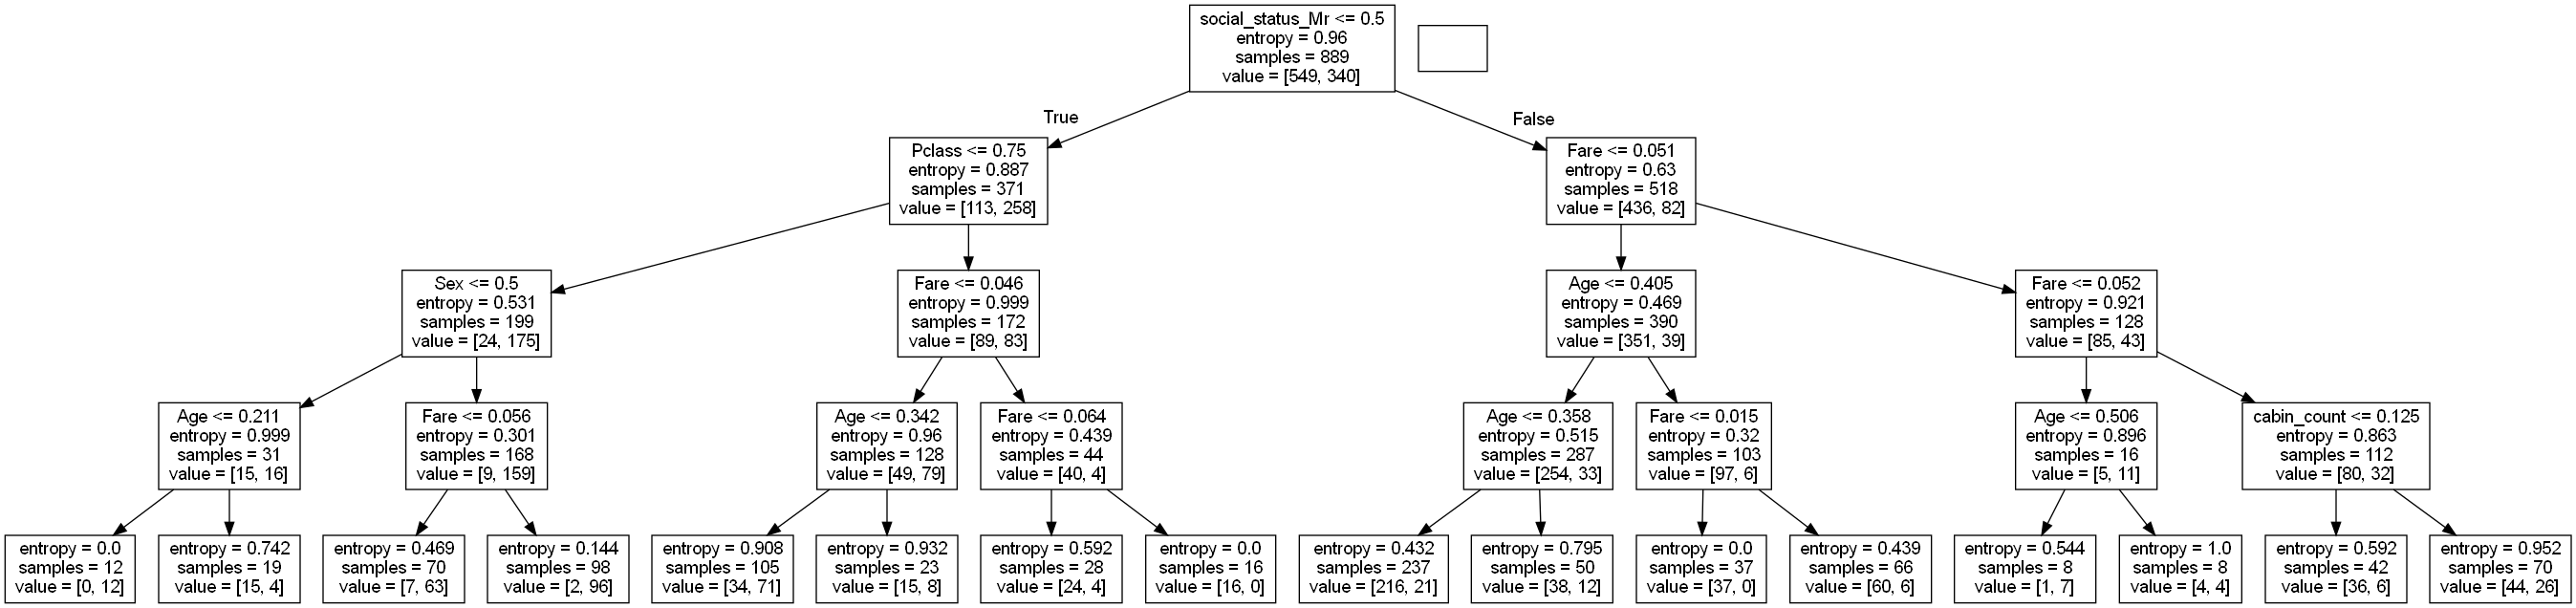

In [445]:
import pydotplus
from sklearn.externals.six import StringIO
from sklearn import tree

dot_data = StringIO()
tree.export_graphviz(best_tree, out_file=dot_data, feature_names=column_names) 

graph = pydotplus.pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("titanic.png")
from IPython.core.display import Image 
Image(filename='titanic.png')

In [446]:
len(test_id), len(best_tree.predict(X_test))

(418, 418)

In [342]:
test_id.dtype ='int'

In [447]:
test_id.shape

(418,)

In [449]:
clf = estimator_results[0].best_estimator_

result = np.concatenate( (test_id.reshape(-1,1), clf.predict(X_test).reshape(-1,1)  ) , axis=1)

In [450]:
df_submssion =pd.DataFrame(result, columns=["PassengerId","Survived"],dtype=int)
df_submssion.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [452]:
df_submssion.to_csv('submission_result.csv', index = False)

In [ ]:
#!pip install kaggle
#!kaggle competitions submit -c titanic -f submission_result.csv -m "My submission message"

## 7️⃣ Splitting continous attribute
연속적인 값을 가지는 Attribute를 기준으로 branch

### Continuous Attribute 나누기
- 불연속적 명목 데이터에 비해 나눌 수 있는 구간이 많음  
Ex) 1 ~ 100

1) 전체 데이터를 모두 기준점으로 한다  

2) 주우이값, 4분위수들을 기준점으로 한다 (binning)  

3) <span style = 'color : red'>Y-class 값이 바뀌는 수를 기준점으로 한다 </span>

- split 할 data를 Sorting 시킨다
- Y-class 데이터가 변경되는 부분 찾기
- 구간별 경계 평균값으로 기준 잡기
- 구간별 경계 값을 기준으로 Entropy or Gini 산출
##### $ Gain(elec_a) = Info(D) - Info_a(D) $
$ Gain(elec_a) $ 보다 큰 값, 작은 값으로 구간 나누기

ex) a = 750, 1350, 2250, 4175일 때 

이 4가지의 Gain 중 가장 큰 값을 Attribute elec의 기준으로 삼는다.

$Max(Gain(elec))$

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
pd_data = pd.read_csv('https://raw.githubusercontent.com/TeamLab/machine_learning_from_scratch_with_python/master/code/ch12/vegeterianl_dataset.csv',delimiter=r"\s+")
pd_data.drop("ID",axis=1)
pd_data

,ID,STREAM,SLOPE,ELEVATION,VEGETATION
0,1,False,steep,3900,chapparal
1,2,True,moderate,300,riparian
2,3,True,steep,1500,riparian
3,4,False,steep,1200,chapparal
4,5,False,flat,4450,conifer
5,6,True,steep,5000,conifer
6,7,True,steep,3000,chapparal


### Sorting
: ELEVATION 기준

In [ ]:
pd_data.sort_values('ELEVATION')

,ID,STREAM,SLOPE,ELEVATION,VEGETATION
1,2,True,moderate,300,riparian
3,4,False,steep,1200,chapparal
2,3,True,steep,1500,riparian
6,7,True,steep,3000,chapparal
0,1,False,steep,3900,chapparal
4,5,False,flat,4450,conifer
5,6,True,steep,5000,conifer


In [ ]:
def get_info(df):
    riparian = df.loc[df['VEGETATION'] == 'riparian']
    chapparal = df.loc[df['VEGETATION'] == 'chapparal']
    conifer = df.loc[df['VEGETATION'] == 'conifer']

    x = np.array([len(riparian) / len(df), len(chapparal) / len(df), len(conifer) / len(df)])
    y = np.log2(x[x!=0])

    info_all = -sum(x[x!=0] * y)
    return info_all

In [ ]:
get_info(pd_data)

1.5566567074628228

In [ ]:
def get_attribute_info(df, attribute_name, continuous_value = 0 ):
    get_infos = []

    if continuous_value == 0 :
        attribute_values = pd_data[attribute_name].unique()

        for value in attribute_values:
            split_df = pd_data.loc[pd_data[attribute_name] == value]
            get_infos.append( (len(split_df) / len(df)) * get_info(split_df))
    
    else:
        split_df_1 = pd_data.loc[pd_data[attribute_name] >= continuous_value ]
        split_df_2 = pd_data.loc[pd_data[attribute_name] < continuous_value ]

        get_infos.append( (len(split_df_1) / len(df)) * get_info(split_df_1))
        get_infos.append( (len(split_df_2) / len(df)) * get_info(split_df_2))

    return sum(get_infos)

In [ ]:
def get_continuos_attribute_info(df, attribute_name):

    result = pd_data.sort_values(attribute_name)

    prior = 0 
    split_index = []
    sorted_key = {}
    sorted_index = {}

    # index를 기준, 값이 바뀌는 index 찾기 
    for index, value in enumerate(result.index):

        # index 이전, 이후의 VEGETATION
        if prior != result["VEGETATION"][value]:
            split_index.append(value)
            prior = result["VEGETATION"][value]

        sorted_index[value] = index
        sorted_key[index] = value

    split_value = []

    for v in split_index[1:]:

        current_value = result[attribute_name][v]

        prior_value_index = sorted_key[sorted_index[v] - 1]

        prior_value = result[attribute_name][prior_value_index]
        
        split_value_average = current_value + prior_value
        # 평균
        split_value.append(split_value_average/2)

    result = {}

    for value in split_value:
        
        result[value] = (get_attribute_info(df, attribute_name, value))

    return result

### 각 Entropy 구하기

In [ ]:
get_continuos_attribute_info(pd_data, "ELEVATION")

{750.0: 1.250698214594781,
 1350.0: 1.3728057820624016,
 2250.0: 0.9649839288804954,
 4175.0: 0.6935361388961918}

Entropy가 작은 값 선택 $\Rightarrow$ Information Gain $\uparrow$

전체 Entropy

In [ ]:
get_info(pd_data)

1.5566567074628228

#### $Max(Gain(elec))$

In [ ]:
for key, value in get_continuos_attribute_info(pd_data, 'ELEVATION').items():
    print(key, ':', get_info(pd_data) - value)

750.0 : 0.3059584928680419
1350.0 : 0.18385092540042125
2250.0 : 0.5916727785823274
4175.0 : 0.863120568566631


4175.0 : 0.863120568566631이 각 Attribute의 Information Gain 중 가장 큼  
$\Rightarrow$ 4175를 기준으로 나누는 것이 좋음

In [ ]:
get_info(pd_data) - get_attribute_info(pd_data, 'STREAM')

0.30595849286804166

In [ ]:
get_info(pd_data) - get_attribute_info(pd_data, 'SLOPE')

0.5774062828523452

### Continuous attribute branch 특징
- 명목속성과 달리, 여러번 재사용 가능 
    명목속성 : Category Data

    Ex) 4175를 기준으로 먼저 나누었지만 나머지는 아직 사용 X  
    => 나머지값을 가지고 branch 가능  
    
    단, 경계값은 달라야 함

- 연속값과 명목값을 동시에 split 가능

    성능상 좋고 나쁨은 데이터에 따라 다름

## 8️⃣ Regression Tree

### Decision Tree로 Regression 문제 풀기

- Y의 값이 continuous일 경우

1) Split measure의 변화

    : entropy Or Gini -> variance (분산)

2) 결과 노드의 선택

    : class -> 해당 instances의 Y평균

3) 나머진 다 같음

![reg](./img/reg.PNG)

### Splitting branch measure

#### $ var(D) = \frac{ \sum_{i=1}^n (y^{(i)} - \bar{y})^2 }{n-1} $
####  where $ \bar{y} = \frac{ \sum_{i=1}^n y^{(i)} }{n} $

##### $ data[best] = argmin_{ attr \in data } \sum_{l \in levels(attr)} \frac{\vert D_{attr = l} \vert}{\vert D \vert} * var(D_{attr = l})$

### Branch 만들기
실제로 CART는 Binary splitting을 실행

In [ ]:
pd_data = pd.read_csv('https://raw.githubusercontent.com/TeamLab/machine_learning_from_scratch_with_python/master/code/ch12/rental_price.csv',delimiter=r"\s+")
pd_data

,ID,SEASON,WORK_DAY,RENTALS
0,1,winter,False,800
1,2,winter,False,826
2,3,winter,True,900
3,4,spring,False,2100
4,5,spring,True,4740
5,6,spring,True,4900
6,8,summer,True,3000
7,9,summer,True,5800
8,10,autumn,False,6200
9,11,autumn,False,2910


In [ ]:
def get_var(df):
    mean_value = df['RENTALS'].mean()
    number_of_value = len(df['RENTALS'])
    return sum( (df['RENTALS'] - mean_value) ** 2 ) / (number_of_value -1)

In [ ]:
get_var(pd_data)

3569590.424242425

### Attribute variance 구하는 함수

In [ ]:
def get_attribute_weighted_var(df, attribute_name):
    levels = df[attribute_name].unique()
    sum_of_weighted_variance = []

    for level in levels:
        split_df = df.loc[df[attribute_name] == level]
        sum_of_weighted_variance.append(
            (len(split_df) / len(df)) * get_var(split_df))
    
    return sum(sum_of_weighted_variance)

In [ ]:
get_attribute_weighted_var(pd_data, 'SEASON')

2227148.0

In [ ]:
get_attribute_weighted_var(pd_data, 'WORK_DAY')

3567498.6666666665

Overfitting이 심하게 발생할 수도 있으므로 depth라던지 parameter 설정 중요